In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1).csv


In [3]:
df=pd.read_csv("Fraud_check (1).csv")

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Urban']= label_encoder.fit_transform(df['Urban'])

In [6]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [7]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [8]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,Single,68833,50047,10,1,Good
1,1,Divorced,33700,134075,18,1,Good
2,0,Married,36925,160205,30,1,Good
3,1,Single,50190,193264,15,1,Good
4,0,Married,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1,Good
596,1,Divorced,69967,55369,2,1,Good
597,0,Divorced,47334,154058,0,1,Good
598,1,Married,98592,180083,17,0,Good


In [9]:
import seaborn as sns

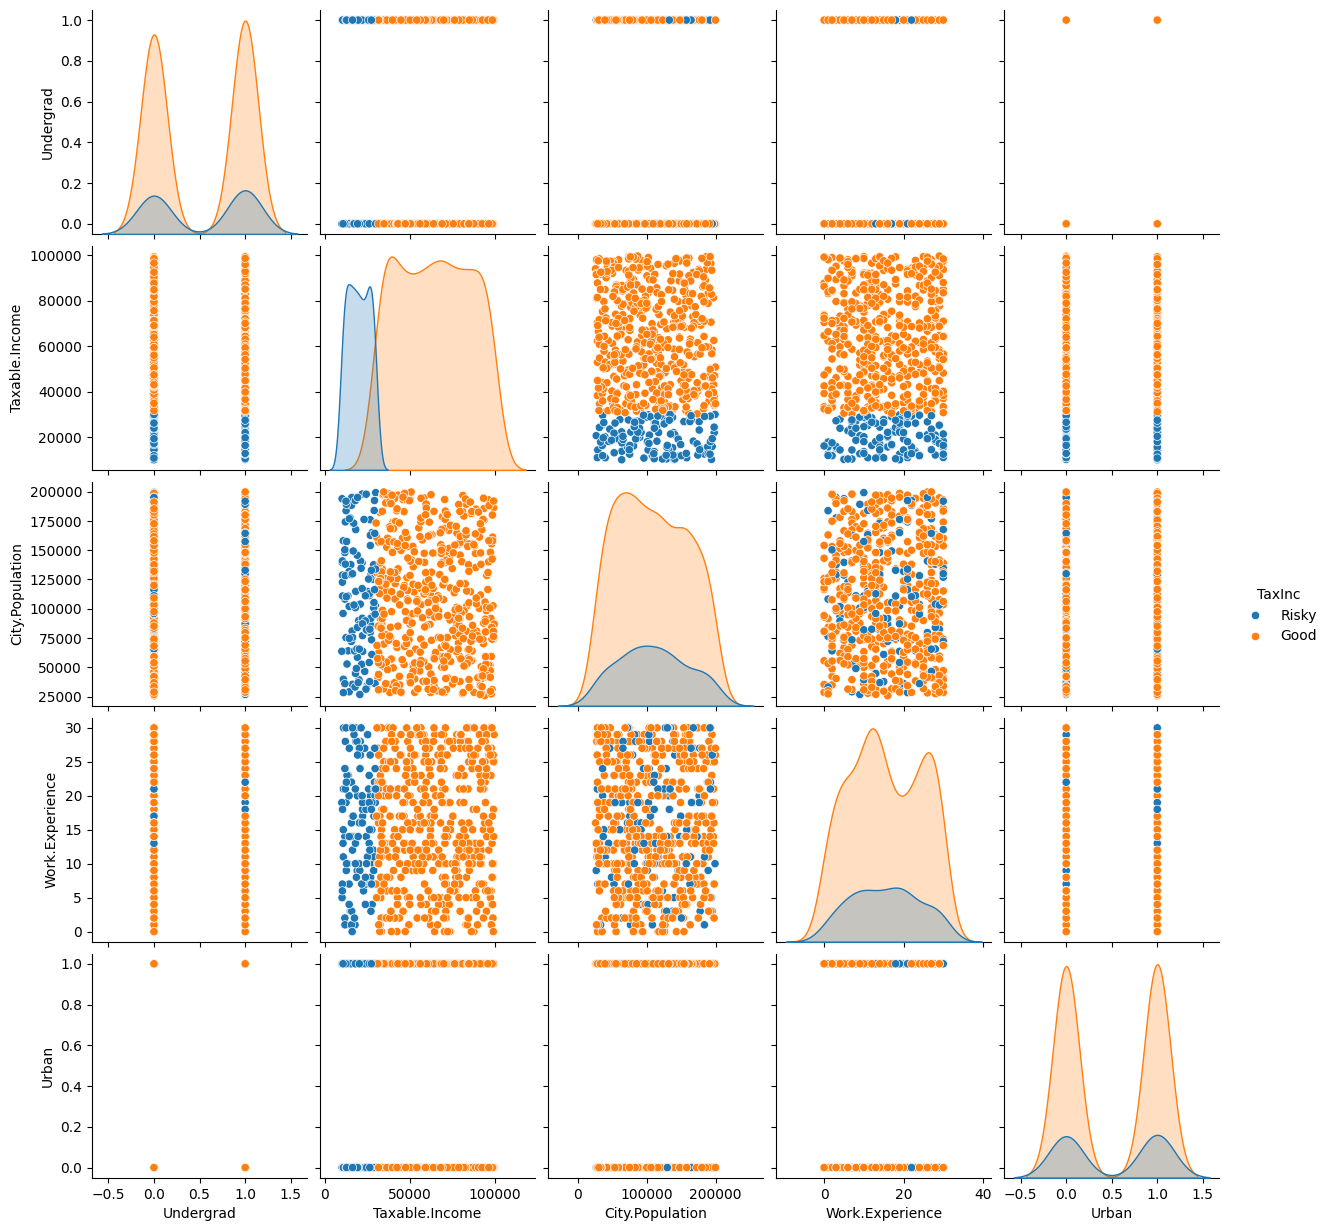

In [10]:
sns.pairplot(data=df, hue = 'TaxInc')

In [11]:
df['TaxInc']= label_encoder.fit_transform(df['TaxInc']) # (0=good,1=bad)

In [12]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,Single,68833,50047,10,1,0
1,1,Divorced,33700,134075,18,1,0
2,0,Married,36925,160205,30,1,0
3,1,Single,50190,193264,15,1,0
4,0,Married,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1,0
596,1,Divorced,69967,55369,2,1,0
597,0,Divorced,47334,154058,0,1,0
598,1,Married,98592,180083,17,0,0


In [13]:
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])

In [14]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [15]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'TaxInc'],
      dtype='object')

In [16]:
x=df[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']]

In [17]:
y=df[['TaxInc']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [20]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

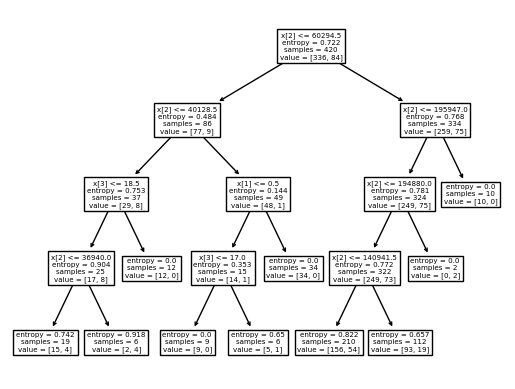

In [21]:
tree.plot_tree(model);

In [22]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['0','1']

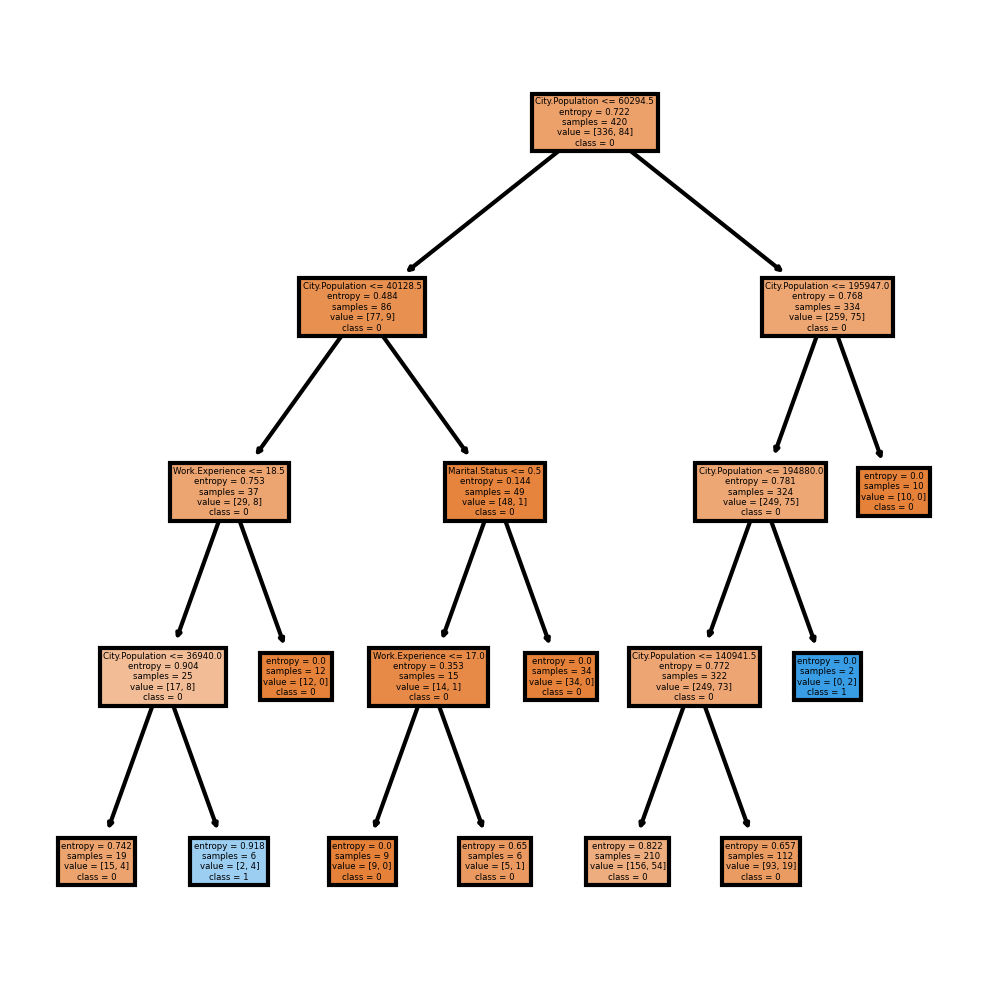

In [23]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [24]:
pred = model.predict(x_test)

In [25]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [39]:
acc_test =accuracy_score(y_test,pred)

In [40]:
acc_test

0.7611111111111111

In [26]:
pd.Series(pred).value_counts()  #0 means "GOOD", 1 menas "RISKY"

0    177
1      3
dtype: int64

In [27]:
model.score(x_test,y_test)

0.7611111111111111

In [ ]:
np.mean(pred==y_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
array = df.values
X = array[:,0:6]
y = array[:,6]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
model.score(X_test,y_test)

1.0